<a href="https://colab.research.google.com/github/sandip924/Data_science_projects/blob/main/Housing_Price_London.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
house=pd.read_csv('London Housing Data.csv')
house.head()

,date,area,average_price,code,houses_sold,no_of_crimes
0,1/1/1995,city of london,91449,E09000001,17.0,NaN
1,2/1/1995,city of london,82203,E09000001,7.0,NaN
2,3/1/1995,city of london,79121,E09000001,14.0,NaN
3,4/1/1995,city of london,77101,E09000001,7.0,NaN
4,5/1/1995,city of london,84409,E09000001,10.0,NaN


# New Section

In [3]:
house.shape

(13549, 6)

In [4]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13549 entries, 0 to 13548
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           13549 non-null  object 
 1   area           13549 non-null  object 
 2   average_price  13549 non-null  int64  
 3   code           13549 non-null  object 
 4   houses_sold    13455 non-null  float64
 5   no_of_crimes   7439 non-null   float64
dtypes: float64(2), int64(1), object(3)
memory usage: 635.2+ KB


In [5]:
house.isnull().sum()

date                0
area                0
average_price       0
code                0
houses_sold        94
no_of_crimes     6110
dtype: int64

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns

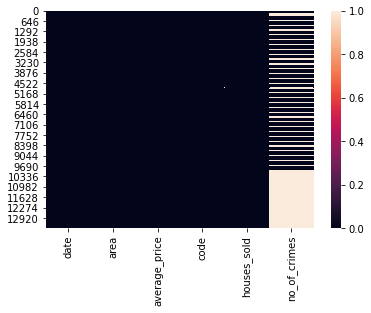

In [7]:
sns.heatmap(house.isnull())
plt.show()

In [8]:
# Q 1 convert the data type of 'date' to 'date-time' format
house.dtypes

date              object
area              object
average_price      int64
code              object
houses_sold      float64
no_of_crimes     float64
dtype: object

In [9]:
house.date=pd.to_datetime(house.date)

In [10]:
house.dtypes

date             datetime64[ns]
area                     object
average_price             int64
code                     object
houses_sold             float64
no_of_crimes            float64
dtype: object

In [11]:
# Q 2 Add new column 'Year' contains years only
house['year']=house['date'].dt.year
house.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [12]:
# Q 3 Add new column 'month' as 2nd column in dataframe contains month only
# syntax -> df.insert(index,new_col_nm, new_col_values)

house['month']=house.insert(1, 'month', house.date.dt.month )
house.head(2)

,date,month,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,None,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,None,city of london,82203,E09000001,7.0,NaN,1995


In [13]:
# Q 4 Remove columns 'month' and 'year' from dataframe
house.drop(['year','month'],axis=1,inplace=True)
house.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes
0,1995-01-01,city of london,91449,E09000001,17.0,NaN
1,1995-02-01,city of london,82203,E09000001,7.0,NaN


In [14]:
# Q 5 show all the records where no_of_crimes=0 and how many such records are there
house[house['no_of_crimes']==0]

,date,area,average_price,code,houses_sold,no_of_crimes
72,2001-01-01,city of london,284262,E09000001,24.0,0.0
73,2001-02-01,city of london,198137,E09000001,37.0,0.0
74,2001-03-01,city of london,189033,E09000001,44.0,0.0
75,2001-04-01,city of london,205494,E09000001,38.0,0.0
76,2001-05-01,city of london,223459,E09000001,30.0,0.0
...,...,...,...,...,...,...
178,2009-11-01,city of london,397909,E09000001,11.0,0.0
179,2009-12-01,city of london,411955,E09000001,16.0,0.0
180,2010-01-01,city of london,464436,E09000001,20.0,0.0
181,2010-02-01,city of london,490525,E09000001,9.0,0.0


In [15]:
len(house[house['no_of_crimes']==0])

104

In [16]:
# Q 6 What is the maximum and minimum 'average_price' per year in England
house['year']=house['date'].dt.year
house.head(2)

,date,area,average_price,code,houses_sold,no_of_crimes,year
0,1995-01-01,city of london,91449,E09000001,17.0,NaN,1995
1,1995-02-01,city of london,82203,E09000001,7.0,NaN,1995


In [17]:
house[house['area']=='england']

,date,area,average_price,code,houses_sold,no_of_crimes,year
13248,1995-01-01,england,53203,E92000001,47639.0,NaN,1995
13249,1995-02-01,england,53096,E92000001,47880.0,NaN,1995
13250,1995-03-01,england,53201,E92000001,67025.0,NaN,1995
13251,1995-04-01,england,53591,E92000001,56925.0,NaN,1995
13252,1995-05-01,england,53678,E92000001,64192.0,NaN,1995
...,...,...,...,...,...,...,...
13544,2019-09-01,england,249942,E92000001,64605.0,NaN,2019
13545,2019-10-01,england,249376,E92000001,68677.0,NaN,2019
13546,2019-11-01,england,248515,E92000001,67814.0,NaN,2019
13547,2019-12-01,england,250410,E92000001,NaN,NaN,2019


In [18]:
house.groupby('year').average_price.max()

year
1995     200722
1996     223197
1997     265112
1998     277600
1999     354241
2000     397353
2001     451028
2002     497538
2003     488704
2004     559286
2005     555847
2006     644541
2007     830950
2008     832753
2009     782459
2010     884674
2011     959520
2012    1077366
2013    1217729
2014    1365050
2015    1353679
2016    1357231
2017    1412255
2018    1463378
2019    1294113
2020    1178166
Name: average_price, dtype: int64

In [19]:
house.groupby('year').average_price.min()

year
1995     41688
1996     40722
1997     42353
1998     43510
1999     43969
2000     47604
2001     49045
2002     54746
2003     67520
2004     88520
2005    110454
2006    121124
2007    131175
2008    120275
2009    117079
2010    119688
2011    115328
2012    113011
2013    112008
2014    114531
2015    117156
2016    121085
2017    121858
2018    124038
2019    124567
2020    126592
Name: average_price, dtype: int64

In [20]:
house.groupby('year').average_price.mean()

year
1995     75880.235185
1996     78875.274908
1997     89618.350000
1998    101747.073801
1999    114256.172222
2000    139979.442593
2001    156932.355556
2002    182190.731481
2003    205099.553704
2004    224604.720370
2005    233314.512963
2006    249303.109259
2007    285944.279630
2008    287478.972222
2009    259296.896296
2010    287559.164815
2011    294819.138889
2012    309409.501852
2013    334589.564815
2014    388208.392593
2015    421356.100000
2016    454884.461111
2017    469978.938889
2018    467240.674074
2019    460056.659259
2020    463329.977778
Name: average_price, dtype: float64

In [21]:
# Q 7 What is maximum and minimum 'No. of crimes' recorded per area
house.groupby('area').no_of_crimes.max()

area
barking and dagenham      2049.0
barnet                    2893.0
bexley                    1914.0
brent                     2937.0
bromley                   2637.0
camden                    4558.0
city of london              10.0
croydon                   3263.0
ealing                    3401.0
east midlands                NaN
east of england              NaN
enfield                   2798.0
england                      NaN
greenwich                 2853.0
hackney                   3466.0
hammersmith and fulham    2645.0
haringey                  3199.0
harrow                    1763.0
havering                  1956.0
hillingdon                2819.0
hounslow                  2817.0
inner london                 NaN
islington                 3384.0
kensington and chelsea    2778.0
kingston upon thames      1379.0
lambeth                   4701.0
lewisham                  2813.0
london                       NaN
merton                    1623.0
newham                    3668.0
north

In [22]:
house.groupby('area').no_of_crimes.min()

area
barking and dagenham      1217.0
barnet                    1703.0
bexley                     860.0
brent                     1850.0
bromley                   1441.0
camden                    2079.0
city of london               0.0
croydon                   2031.0
ealing                    1871.0
east midlands                NaN
east of england              NaN
enfield                   1635.0
england                      NaN
greenwich                 1513.0
hackney                   1870.0
hammersmith and fulham    1323.0
haringey                  1536.0
harrow                     937.0
havering                  1130.0
hillingdon                1445.0
hounslow                  1529.0
inner london                 NaN
islington                 1871.0
kensington and chelsea    1347.0
kingston upon thames       692.0
lambeth                   2381.0
lewisham                  1675.0
london                       NaN
merton                     819.0
newham                    2130.0
north

In [23]:
house.groupby('area').no_of_crimes.min().sort_values(ascending=False)

area
westminster               3504.0
lambeth                   2381.0
southwark                 2267.0
newham                    2130.0
camden                    2079.0
croydon                   2031.0
islington                 1871.0
ealing                    1871.0
hackney                   1870.0
brent                     1850.0
barnet                    1703.0
lewisham                  1675.0
tower hamlets             1646.0
enfield                   1635.0
wandsworth                1582.0
waltham forest            1575.0
haringey                  1536.0
hounslow                  1529.0
greenwich                 1513.0
redbridge                 1487.0
hillingdon                1445.0
bromley                   1441.0
kensington and chelsea    1347.0
hammersmith and fulham    1323.0
barking and dagenham      1217.0
havering                  1130.0
harrow                     937.0
bexley                     860.0
merton                     819.0
sutton                     787.0
richm

In [24]:
# Q 8 show all the records of each area where average_price is less than 100000
house[house['average_price']<100000].area.value_counts()

north east              112
north west              111
yorks and the humber    110
east midlands            96
west midlands            94
england                  87
barking and dagenham     85
south west               78
east of england          76
newham                   72
bexley                   64
waltham forest           64
lewisham                 62
havering                 60
south east               59
greenwich                59
croydon                  57
sutton                   54
enfield                  54
hackney                  53
redbridge                52
southwark                48
tower hamlets            47
outer london             46
hillingdon               44
lambeth                  41
hounslow                 41
brent                    40
london                   39
merton                   35
haringey                 33
bromley                  33
inner london             31
ealing                   31
kingston upon thames     30
harrow              